# Importar bibliotecas

Aquí importamos todas las bibliotecas necesarias para el proyecto. Esto incluye bibliotecas para manipulación de datos, aprendizaje automático y visualización.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

# Generar datos de ejemplo

Generamos un conjunto de datos de ejemplo para simular un escenario real. Este conjunto de datos incluye varias características que son comunes en los perfiles de Twitter, como el número de seguidores, el número de estados y si la cuenta está verificada o no.

In [36]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('humanized_arg_data.csv')

# Mostrar las primeras filas del conjunto de datos para tener una idea de la estructura
df.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,...,urls_per_tweet,sensitive_words_count,automation_level,sentiment_uniformity,directed_tweets_ratio,bidirectional_conversations,profile_images_count,email_verified,phone_verified,is_fake
0,8804,Ualá,uala_arg,5614,67585,476,420,282,0,0,...,0.143377,0,0.072944,0.501994,0.215709,0.256935,4,1,1,0
1,1954,UaláAyuda,uala_arg,8,11,20,8,4,1,1,...,1.602796,2,0.890123,0.976165,0.829181,0.041471,1,0,0,1
2,3897,UaláAyuda,uala_ayuda,89,7,30,2,2,1,1,...,1.534727,4,0.925292,0.909297,0.959266,0.082105,1,0,0,1
3,5920,UaláSupport,uala_ayuda,84,16,17,3,0,1,1,...,1.899393,2,0.957200,0.923609,0.986746,0.001898,1,0,0,1
4,1866,UaláAyuda,uala_arg,30,13,13,8,1,1,1,...,1.576985,2,0.963410,0.937980,0.971414,0.014663,1,0,0,1


# Preprocesamiento de datos

En esta sección, realizamos el preprocesamiento de los datos. Esto incluye dividir el conjunto de datos en conjuntos de entrenamiento y prueba, y normalizar las características.

Columnas:
```
id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,lang,time_zone,location,description,account_age_days,retweet_ratio,duplicate_content_ratio,mentions_per_tweet,hashtags_per_tweet,urls_per_tweet,sensitive_words_count,automation_level,sentiment_uniformity,directed_tweets_ratio,bidirectional_conversations,profile_images_count,email_verified,phone_verified,is_fake
```

In [37]:
numerical_features = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 
                      'listed_count', 'account_age_days', 'retweet_ratio', 'duplicate_content_ratio', 
                      'mentions_per_tweet', 'hashtags_per_tweet', 'urls_per_tweet', 'sensitive_words_count', 
                      'automation_level', 'sentiment_uniformity', 'directed_tweets_ratio', 
                      'bidirectional_conversations', 'profile_images_count']

non_numerical_features = ['name', 'screen_name', 'default_profile', 'default_profile_image', 'geo_enabled', 
                          'lang', 'time_zone', 'location', 'description', 'email_verified', 'phone_verified']

# Separar las características y la variable objetivo
X = df[numerical_features + non_numerical_features]
y = df['is_fake']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numerical_features)])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de Random Forest

Utilizamos un modelo de Random Forest para entrenar nuestro clasificador. Este modelo es apto para manejar una variedad de tipos de datos y es fácilmente interpretable, lo que lo hace ideal para nuestro uso.

In [38]:
# Aplicar el preprocesador y entrenar el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=50))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['statuses_count',
                                                   'followers_count',
                                                   'friends_count',
                                                   'favourites_count',
                                                   'listed_count',
                                                   'account_age_days',
                                                   'retweet_ratio',
                                                   'duplicate_content_ratio',
                                                   'mentions_per_tweet',
                                                   'hashtags_per_tweet',
                                                   'urls_per_tweet',
                                                   'sensitive_words_count',
                                                   'automation_level',
                                                   'sentiment_uniformity',
                                                   'directed_tweets_ratio',
                                                   'bidirectional_conversations',
                                                   'profile_images_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'screen_name',
                                                   'default_profile',
                                                   'default_profile_image',
                                                   'geo_enabled', 'lang',
                                                   'time_zone', 'location',
                                                   'description',
                                                   'email_verified',
                                                   'phone_verified'])])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

# Evaluación del modelo

Después de entrenar el modelo, lo evaluamos utilizando el conjunto de datos de prueba. Utilizamos varias métricas, como la precisión y el F1 Score, para medir el rendimiento del modelo.

In [39]:
y_pred = pipeline.predict(X_test)

# Mostrar métricas
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.6666666666666666
F1 Score:  0.8


# Matriz de confusión

La matriz de confusión nos da una visión más detallada del rendimiento del modelo, mostrándonos los verdaderos positivos, los verdaderos negativos, los falsos positivos y los falsos negativos.

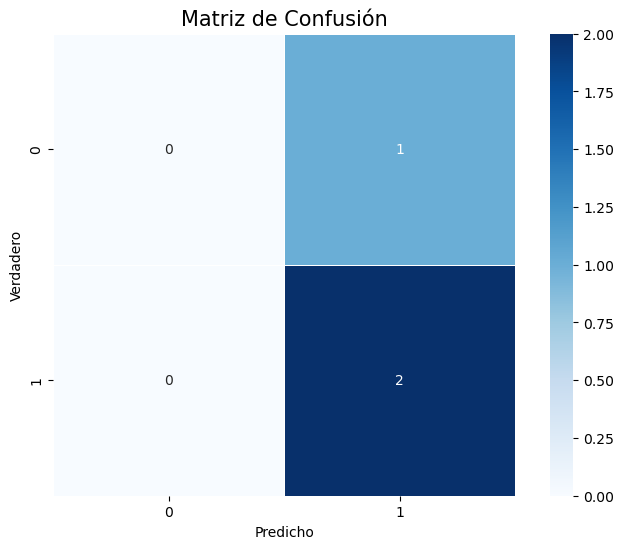

In [40]:
# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión', size = 15)
plt.show()

# Curva ROC

La Curva Característica de Operación del Receptor (ROC) es otra herramienta para evaluar la calidad de nuestro modelo de clasificación. El Área Bajo la Curva (AUC) nos da una sola métrica para comparar modelos.

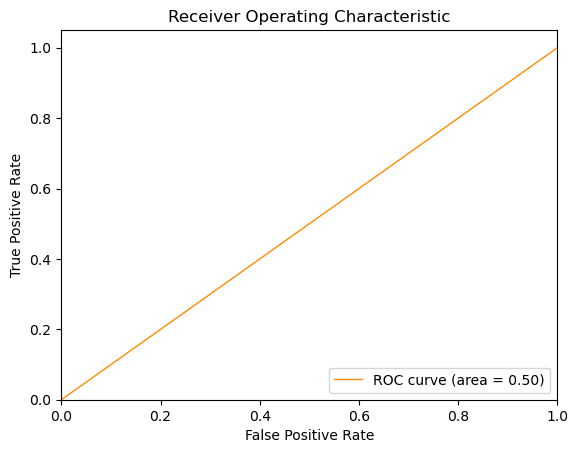

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Seccion test manual

In [42]:
# Crear un diccionario con las características del perfil de ejemplo
# Asegúrate de incluir todos los campos que usaste para entrenar el modelo
perfil_ejemplo = {
    'statuses_count': [200],
    'followers_count': [150],
    'friends_count': [100],
    'favourites_count': [50],
    'listed_count': [2],
    'account_age_days': [365],
    'retweet_ratio': [0.2],
    'duplicate_content_ratio': [0.1],
    'mentions_per_tweet': [0.5],
    'hashtags_per_tweet': [0.5],
    'urls_per_tweet': [0.3],
    'sensitive_words_count': [0],
    'automation_level': [0.1],
    'sentiment_uniformity': [0.5],
    'directed_tweets_ratio': [0.4],
    'bidirectional_conversations': [0.3],
    'profile_images_count': [1],
    'name': ['John Doe'],
    'screen_name': ['john_doe'],
    'default_profile': ['True'],
    'default_profile_image': ['False'],
    'geo_enabled': ['False'],
    'lang': ['en'],
    'time_zone': ['Eastern Time (US & Canada)'],
    'location': ['New York'],
    'description': ['Love coding and tech stuff'],
    'email_verified': ['True'],
    'phone_verified': ['False']
}

# Convertir el diccionario en un DataFrame de pandas
perfil_ejemplo_df = pd.DataFrame.from_dict(perfil_ejemplo)

# Utilizar el modelo entrenado para hacer una predicción
prediccion = pipeline.predict(perfil_ejemplo_df)

# Imprimir el resultado
if prediccion[0] == 0:
    print("El perfil es legítimo según el modelo.")
else:
    print("El perfil es falso según el modelo.")


El perfil es falso según el modelo.
